This notebook will Illustrate the process of getting the abnormal data from a string of data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def get_3sigmaBound(data):
    mean = np.mean(data)
    standard_div = np.std(data)
    upperbound = mean + 3*standard_div
    lowerbound = mean - 3*standard_div
    return [upperbound, lowerbound]

In [3]:
#the function that do the stuff above
def check_abnormal(init,s1,hd,Data):
    states={} #empty dictionary discribing the current interveral data
    end=init+s1 #a stop for the s1 interval
    states['num'] = end #start checking at that posision of data
    
    #get the upperbound and lowerbound of the data
    states['up'],states['low'] = get_3sigmaBound(Data[init : end])
    
    #loop and check for abnormal data with upper and lower bound
    for data in Data[end:end+hd]:
        #if found abnormal, return the dictionary
        if data >= states['up'] or data <= states['low']: return states
        states['num'] += 1
    #loop is done, and num is noted at Nan
    states['num'] = np.NaN
    return states
     

In [4]:
def perform_3sig(s1,hd,Data):
    init = 0 #act as the starting position for the operation
    result = {'up':[],'low':[]} #empty dictionary for result appending
    while True:
        #limter for operation going over the data value
        if init+s1+hd >= len(data) : break
        #call in the operation to check the abnormal value
        states = check_abnormal(init,s1,hd,data)
        result['low'].append(states['low']) # append everything to the result
        result['up'].append(states['up'])
        #check if the data found a abnormal. if so, the operation terminate
        if not np.isnan(states['num']) :
            result['num'] = states['num']
            break
        #move to next hd
        init += hd 
    return result

In [5]:
def plot_data(s1,hd,Data,abnormal):
    plt.plot(data,'r')
    for interation in range(0,len(abnormal['low'])):
        i1 = interation*(hd)  
        e1 = s1+hd*interation
        i2 = s1+hd*interation
        e2 = s1+hd*interation+hd
        plt.plot(range(i1,e1),np.full(shape=s1,fill_value = abnormal['low'][interation]),'m',)
        plt.plot(range(i2,e2),np.full(shape=hd,fill_value = abnormal['low'][interation]),'k',)
        plt.plot(range(i1,e1),np.full(shape=s1,fill_value = abnormal['up'][interation]),'m')
        plt.plot(range(i2,e2),np.full(shape=hd,fill_value = abnormal['up'][interation]),'k')
    if 'num' in abnormal.keys() : plt.plot([abnormal['num']],data[abnormal['num']],'b',)
    plt.show()

[-0.049038105676658006, 0.0]
[2.549038105676658, 3.0]
9


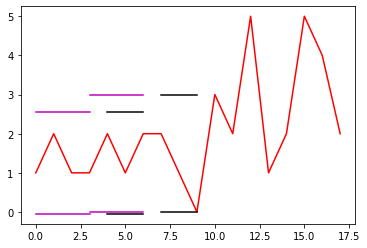

In [6]:
data = np.array([1,2,1,1,2,1,2,2,1,0,3,2,5,1,2,5,4,2])
s1 = 4
hd = 3

abnormal = perform_3sig(s1,hd,data)  

print(abnormal['low'])
print(abnormal['up'])
if 'num' in abnormal.keys():
    print(abnormal['num'])
    
plot_data(s1,hd,data,abnormal)